## Daniel Ochoa Ejercicio 16

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
import pandas as pd

In [2]:
data = pd.read_csv('Cars93.csv')
keys = ['MPG.city', 'MPG.highway', 'EngineSize',
            'Horsepower', 'RPM', 'Rev.per.mile',
            'Fuel.tank.capacity', 'Passengers', 'Length',
            'Wheelbase', 'Width', 'Turn.circle', 'Weight']
dataX = data[keys].values.reshape(-1, len(keys))
dataY = data['Price'].values.reshape(-1, 1)
loo =  LeaveOneOut()
loo.get_n_splits(dataX);
alphas = np.logspace(-6, 1, num = 50)

betas_alphas = np.zeros((len(keys) +1 , len(alphas)))
mses_alphas = np.zeros(len(alphas))

for j, alpha in enumerate(alphas):
    clf = linear_model.Lasso(alpha = alpha, normalize = True)
    mses = np.zeros(len(dataY))
    for i, (train_index, test_index) in enumerate(loo.split(dataX)):
        X_train, X_test = dataX[train_index], dataX[test_index]
        y_train, y_test = dataY[train_index], dataY[test_index]
        clf.fit(X_train, y_train)
        mses[i] = mse(clf.predict(X_test), y_test)
    mses_alphas[j] = mses.mean()
    clf.fit(dataX, dataY)
    betas_alphas[0, j] = clf.intercept_
    betas_alphas[1:, j] = clf.coef_

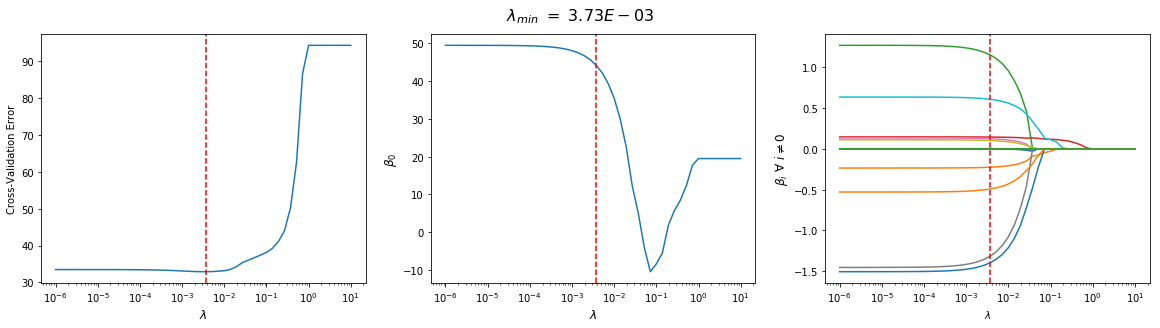

In [3]:
alpha_min = alphas[np.argmin(mses_alphas)]
fig, axs = plt.subplots(1, 3, figsize = (16, 4.5), constrained_layout=True)
axs[0].semilogx(alphas, mses_alphas);
axs[0].set_xlabel(r"$\lambda$", fontsize = 12);
axs[0].set_ylabel("Cross-Validation Error");
axs[0].axvline(alpha_min, linestyle = '--', color = 'r');

axs[1].semilogx(alphas, betas_alphas[0,:].T);
axs[1].set_xlabel(r"$\lambda$", fontsize = 12);
axs[1].set_ylabel(r"$\beta_0$", fontsize = 12)
axs[1].axvline(alpha_min, linestyle = '--', color = 'r');


axs[2].semilogx(alphas, betas_alphas[1:,:].T);
axs[2].set_xlabel(r"$\lambda$", fontsize = 10);
axs[2].set_ylabel(r"$\beta_i\ \forall\ i\neq 0$", fontsize = 12);
axs[2].axvline(alpha_min, linestyle = '--', color = 'r');

str_title = "\lambda_{min}"
plt.suptitle(fr"${str_title}\ =\ {alpha_min:.2E}$", fontsize = 16);



Para el lambda que minimizó el error de *cross-validation* se verifican los parámetros que más influencia tienen en el modelo. Para esto, se especifican aquellos diferentes a $0$ con una tolerancia absoluta de $1x10^{-02}$ como aquellos con la mayor influencia.

In [4]:
selector = np.logical_not(np.isclose(betas_alphas[:,np.argmin(mses_alphas)], np.zeros(len(keys)+1), atol =1e-02))[1:]
npKeys = np.array(keys, dtype = str)
influence = npKeys[selector]
print("Variables con mayor influencia:\n",influence)

Variables con mayor influencia:
 ['MPG.highway' 'EngineSize' 'Horsepower' 'Fuel.tank.capacity' 'Passengers'
 'Length' 'Wheelbase' 'Width' 'Turn.circle']
